!mkdir dataset
!mkdir dataset/Bacterial_spot
!mkdir dataset/Early_blight
!mkdir dataset/healthy
!mkdir dataset/Late_blight
!mkdir dataset/Leaf_Mold
!mkdir dataset/Septoria_leaf_spot
!mkdir dataset/Spider_mites_Two-spotted_spider_mite
!mkdir dataset/Target_Spot
!mkdir dataset/Tomato_mosaic_virus
!mkdir dataset/Tomato_Yellow_Leaf_Curl_Virus

import shutil
fuente = '/content/drive/MyDrive/Dataset/Bacterial_spot'
destino = '/content/dataset/Bacterial_spot'

imagenes = os.listdir(fuente)

for i,nombreimg in enumerate(imagenes):
  if i<500:
    shutil.copy(fuente+'/'+nombreimg,destino+'/'+nombreimg)

    !rm -rf dataset

#Modelo  

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
#from google.colab import drive

# Montar Google Drive
#drive.mount('/content/drive')

# Ruta a la carpeta del dataset
#carpeta = '/content/drive/MyDrive/Dataset'

carpeta = '/content/dataset'

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5,1.5],
    validation_split = 0.2
)

In [ ]:
#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory(carpeta,target_size=(224,224),
                                                     batch_size=32,shuffle = True, subset='training')
data_gen_pruebas = datagen.flow_from_directory(carpeta,target_size=(224,224),
                                                     batch_size=32,shuffle = True, subset='validation')

Found 4000 images belonging to 11 classes.
Found 1000 images belonging to 11 classes.


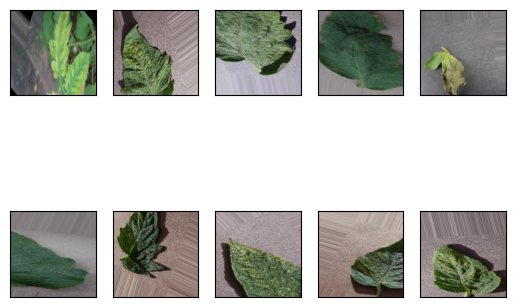

In [ ]:
#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://www.kaggle.com/models/google/mobilenet-v3/frameworks/TensorFlow2/variations/large-075-224-feature-vector/versions/1"
mobilenetv3 = hub.KerasLayer(url, input_shape =(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv3.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
      mobilenetv3,
      tf.keras.layers.Dense(11,activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2731616   
                                                                 
 dense (Dense)               (None, 11)                14091     
                                                                 
Total params: 2745707 (10.47 MB)
Trainable params: 14091 (55.04 KB)
Non-trainable params: 2731616 (10.42 MB)
_________________________________________________________________


In [ ]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento,
    epochs = EPOCAS,
    batch_size=32,
    validation_data = data_gen_pruebas
)

Epoch 1/50
125/125 [==============================] - 112s 778ms/step - loss: 1.3765 - accuracy: 0.5825 - val_loss: 1.0052 - val_accuracy: 0.7000
Epoch 2/50
125/125 [==============================] - 80s 645ms/step - loss: 0.8541 - accuracy: 0.7448 - val_loss: 0.7909 - val_accuracy: 0.7530
Epoch 3/50
125/125 [==============================] - 89s 717ms/step - loss: 0.7175 - accuracy: 0.7853 - val_loss: 0.6828 - val_accuracy: 0.7860
Epoch 4/50
125/125 [==============================] - 80s 642ms/step - loss: 0.6435 - accuracy: 0.8070 - val_loss: 0.6379 - val_accuracy: 0.8030
Epoch 5/50
125/125 [==============================] - 88s 703ms/step - loss: 0.5812 - accuracy: 0.8165 - val_loss: 0.6251 - val_accuracy: 0.7860
Epoch 6/50
125/125 [==============================] - 80s 641ms/step - loss: 0.5412 - accuracy: 0.8395 - val_loss: 0.6140 - val_accuracy: 0.8060
Epoch 7/50
125/125 [==============================] - 81s 649ms/step - loss: 0.5301 - accuracy: 0.8320 - val_loss: 0.5615 - val_a

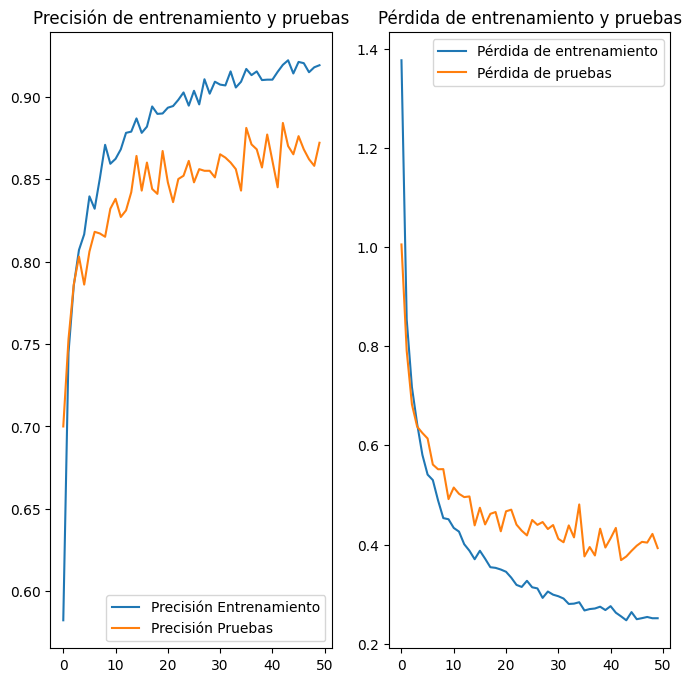

In [11]:
# Gráficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()